In [2]:
import pandas as pd

df = pd.read_csv('customersdata.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.shape

(440, 8)

In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
indices = [35,96,365,176,435]
muestras = pd.DataFrame(df.loc[indices],
                        columns= df.keys()).reset_index(drop=True)
muestras

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,688,5491,11091,833,4239,436
1,2,3,23,2616,8118,145,3874,217
2,2,3,4692,6128,8025,1619,4515,3105
3,1,3,45640,6958,6536,7368,1532,230
4,1,3,29703,12051,16027,13135,182,2204


In [7]:
df = df.drop(indices,axis=0)

In [8]:
df = df. drop(['Region','Channel'], axis= 1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
434,16731,3922,7994,688,2371,838
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [9]:
muestras = muestras. drop(['Region','Channel'], axis= 1)
muestras

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,688,5491,11091,833,4239,436
1,23,2616,8118,145,3874,217
2,4692,6128,8025,1619,4515,3105
3,45640,6958,6536,7368,1532,230
4,29703,12051,16027,13135,182,2204


In [10]:
from sklearn import preprocessing
scaled_df = preprocessing.Normalizer().fit_transform(df)
scaled_df

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

In [11]:
scaled_muestras = preprocessing.Normalizer().fit_transform(muestras)
scaled_muestras

array([[0.05238528, 0.41809237, 0.84448414, 0.06342578, 0.32276335,
        0.03319765],
       [0.00245429, 0.27914916, 0.86625875, 0.01547272, 0.41338832,
        0.02315572],
       [0.37492201, 0.48966796, 0.64125087, 0.12936887, 0.36077853,
        0.24811015],
       [0.96630093, 0.14731643, 0.13838175, 0.15599705, 0.03243587,
        0.00486961],
       [0.77689   , 0.31519716, 0.41919052, 0.34354948, 0.00476026,
        0.05764622]])

In [12]:
from sklearn.cluster import KMeans
X = scaled_df.copy()

inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters= i, init="k-means++",
                        max_iter= 300, n_init= 10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)
    


C:\Users\pablo.villagran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

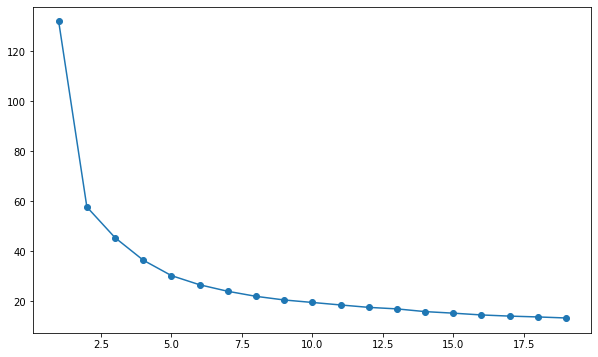

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = [10,6])
plt.title = "Metodo del Codo"
plt.xlabel = "No. de Clusters"
plt.ylabel = "Inercia"
plt.plot( list(range(1,20)), inercia, marker="o" )
plt.show

In [14]:
algoritmo = KMeans( n_clusters=6, 
                    init="k-means++", 
                    max_iter=300, 
                    n_init= 10)
algoritmo.fit(X)
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [15]:
muestra_predict = algoritmo.predict(scaled_muestras)
for i,pred in enumerate(muestra_predict):
    print("Muestra {} se encuentra en el centroide {} .".format(i, pred) )
    

Muestra 0 se encuentra en el centroide 3 .
Muestra 1 se encuentra en el centroide 3 .
Muestra 2 se encuentra en el centroide 3 .
Muestra 3 se encuentra en el centroide 1 .
Muestra 4 se encuentra en el centroide 4 .


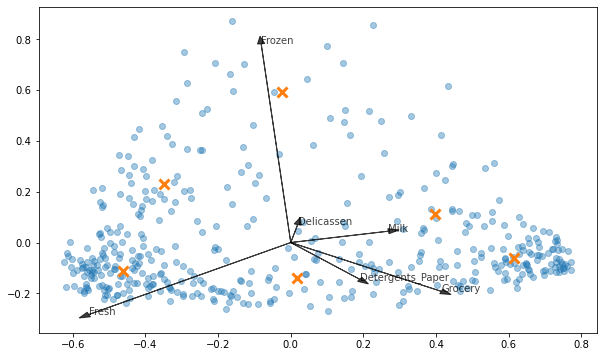

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components=2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)
centroides_pca = modelo_pca.transform(centroides)

plt.figure(figsize = [10,6]) 
plt.scatter(pca[:, 0], pca[:,1], marker='o', alpha=0.4)
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker='x', linewidths= 3, s=100)

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df.columns

for i in range(len(columnas)):
    plt.arrow(0,0, xvector[i], yvector[i], color="black", width=0.0005, head_width = 0.02, alpha=0.75)
    plt.text(xvector[i], yvector[i], list(columnas)[i], color="black", alpha=0.75)

plt.show()
    


